In [2]:
# Esports Statistics from 1998-2024
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import matplotlib



In [3]:
data = pd.read_csv("HistoricalEsportData.csv")


data["Earnings"] = pd.to_numeric(data["Earnings"], errors="coerce")
data["Players"] = pd.to_numeric(data["Players"], errors="coerce")
data["Tournaments"] = pd.to_numeric(data["Tournaments"], errors="coerce")

data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

data["Game_numerical"] = pd.factorize(data["Game"])[0]






In [4]:
ge_data = pd.read_csv("GeneralEsportData.csv")

ge_data["Genre_number"] = pd.factorize(ge_data["Genre"])[0]




In [5]:

data["Genre"] = data["Game"].map(ge_data.set_index("Game")["Genre"])

print(data)

data.to_csv("new_data.csv", index = False)


            Date                                Game  Earnings  Players  \
0     1998-01-01        Command & Conquer: Red Alert   15000.0        8   
1     1998-01-01                          QuakeWorld   15000.0        8   
2     1998-05-01                            Quake II   15000.0        4   
3     1998-05-01                  Total Annihilation   15000.0        2   
4     1998-05-01                          QuakeWorld     300.0        3   
...          ...                                 ...       ...      ...   
10234 2024-10-01       Super Street Fighter II Turbo     340.0        3   
10235 2024-10-01               Skullgirls 2nd Encore     330.0        3   
10236 2024-10-01       StarCraft: Evo Complete (Mod)     308.0        4   
10237 2024-10-01            Melty Blood: Type Lumina     280.0        3   
10238 2024-10-01  Power Rangers: Battle for the Grid     200.0        3   

       Tournaments  Game_numerical                 Genre  
0                1               0      

In [6]:
data.describe()




,Date,Earnings,Players,Tournaments,Game_numerical
count,10239,1.023900e+04,10239.000000,10239.000000,10239.000000
mean,2017-05-30 10:40:45.004395008,1.862778e+05,61.525051,6.565192,230.075007
min,1998-01-01 00:00:00,0.000000e+00,0.000000,1.000000,0.000000
25%,2014-06-01 00:00:00,1.206860e+03,6.000000,1.000000,113.000000
50%,2018-10-01 00:00:00,1.175000e+04,17.000000,2.000000,208.000000
75%,2021-07-01 00:00:00,7.756945e+04,53.000000,6.000000,337.000000
max,2024-10-01 00:00:00,4.014065e+07,2134.000000,172.000000,620.000000
std,NaN,9.854799e+05,136.079728,12.055580,156.523132


In [7]:
data["Year"] = pd.to_datetime(data["Date"]).dt.year
summ_tournament = data.groupby("Year")["Tournaments"].describe()
print(summ_tournament)


      count      mean        std  min  25%  50%    75%    max
Year                                                         
1998   10.0  1.100000   0.316228  1.0  1.0  1.0   1.00    2.0
1999   10.0  1.600000   1.074968  1.0  1.0  1.0   1.75    4.0
2000   34.0  1.911765   1.464068  1.0  1.0  1.0   2.00    8.0
2001   38.0  1.710526   1.010964  1.0  1.0  1.0   2.00    5.0
2002   52.0  1.750000   1.384437  1.0  1.0  1.0   2.00    8.0
2003   83.0  2.481928   2.171666  1.0  1.0  2.0   3.00   12.0
2004   94.0  3.234043   3.230984  1.0  1.0  1.0   4.00   12.0
2005  132.0  2.924242   2.813873  1.0  1.0  2.0   3.00   11.0
2006  147.0  3.068027   3.234361  1.0  1.0  2.0   4.00   17.0
2007  184.0  3.184783   3.961369  1.0  1.0  1.0   3.00   23.0
2008  189.0  3.042328   3.223634  1.0  1.0  2.0   4.00   15.0
2009  177.0  3.858757   3.783539  1.0  1.0  2.0   6.00   16.0
2010  234.0  4.337607   7.192727  1.0  1.0  2.0   5.00   59.0
2011  265.0  6.467925  13.771124  1.0  1.0  3.0   5.00   80.0
2012  33

## reset_index återställer index

In [8]:
summ_money = data.groupby("Game")[["Earnings"]].sum().reset_index()
print(summ_money)

                         Game    Earnings
0                        ARMS    22759.90
1    Acceleration of SUGURI 2      410.00
2                     After-H    83863.40
3              Age of Empires   736284.75
4           Age of Empires II  3899608.73
..                        ...         ...
616                 eFootball   492000.00
617               iRacing.com  3757336.03
618                      osu!   279092.83
619                   rFactor    15083.56
620                 rFactor 2  2218753.12

[621 rows x 2 columns]


In [9]:
# vi kontrollerar om det finns null-värden
null_values = data.isnull().sum()

null_values

Date              0
Game              0
Earnings          0
Players           0
Tournaments       0
Game_numerical    0
Genre             0
Year              0
dtype: int64

(10.0, 5000000.0)

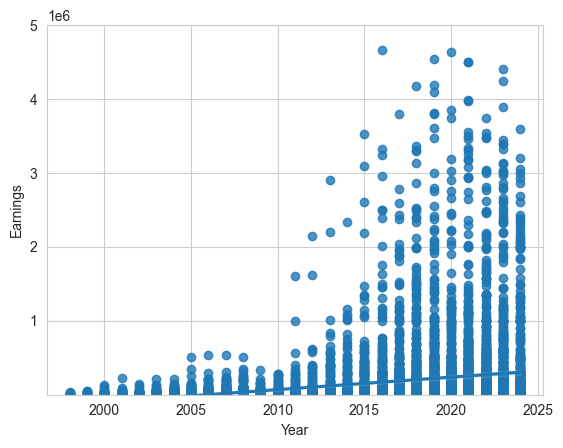

In [10]:
sns.set_style("whitegrid")
axes = sns.regplot(x=data.Year, y=data.Earnings)
axes.set_ylim(10, 5000000)


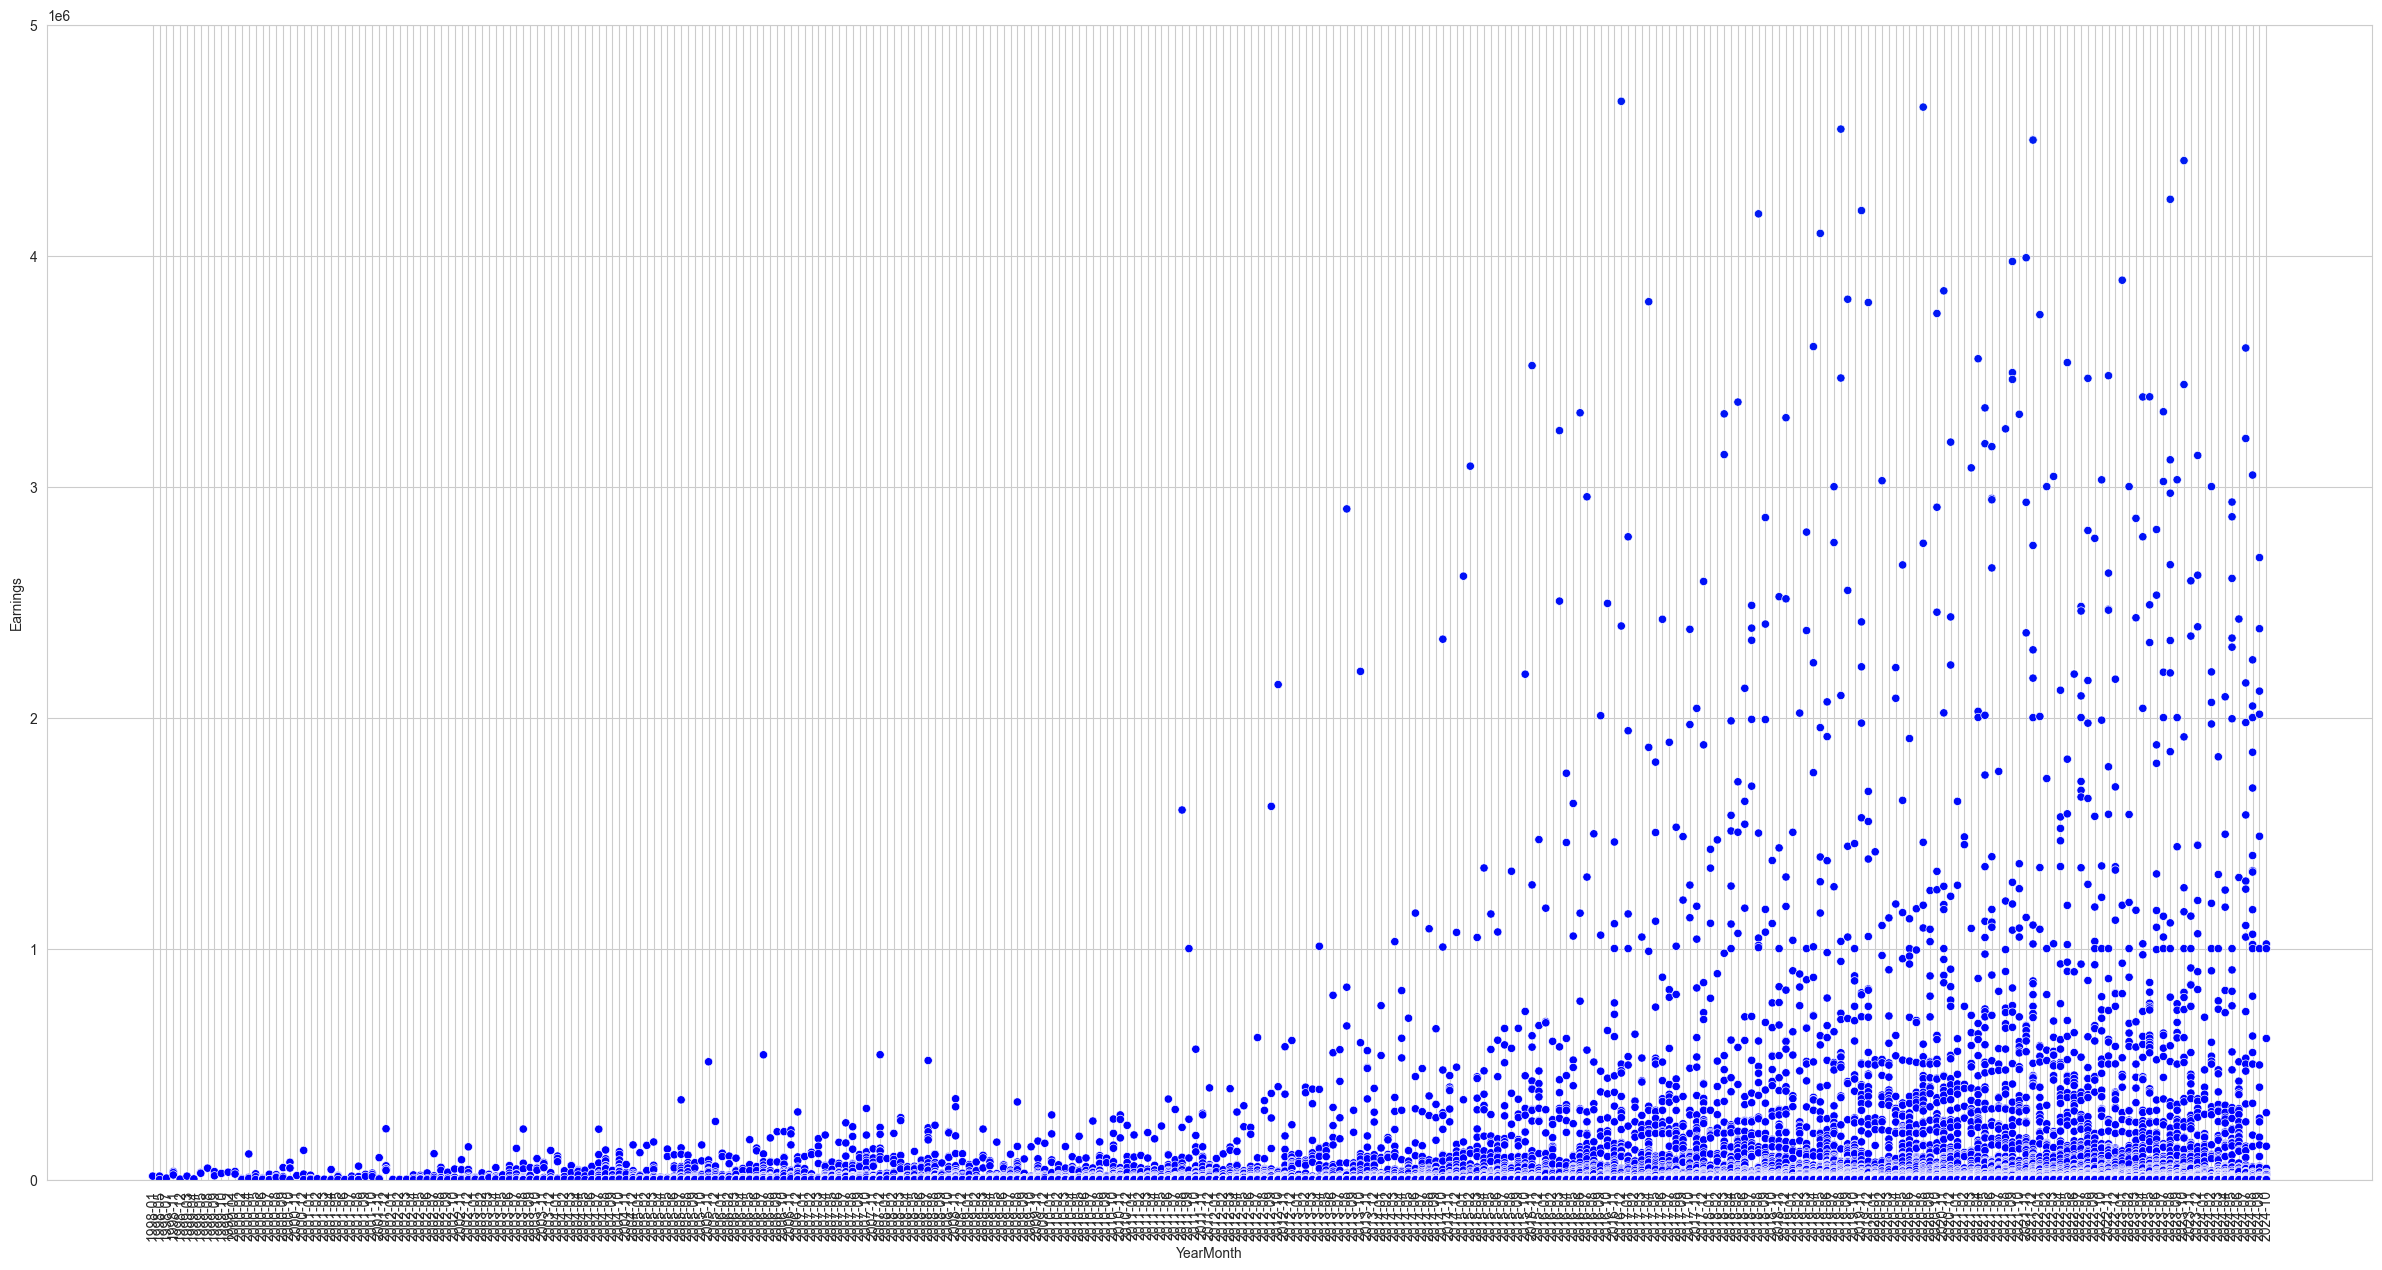

In [11]:
data["YearMonth"] = data["Date"].dt.strftime("%Y-%m")
plt.figure(figsize=(30, 15))
axes = sns.scatterplot(data=data, x="YearMonth", y="Earnings", hue="Earnings", palette = "winter", legend = False)
axes.set_ylim(0, 5000000)
plt.xticks(rotation=90);




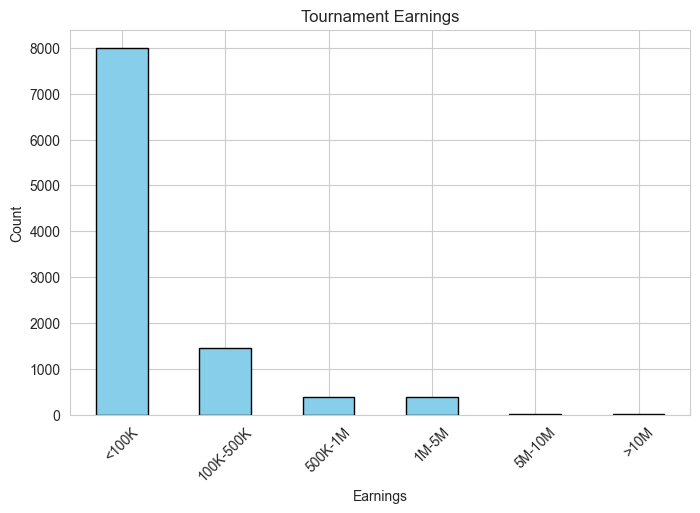

In [12]:

earnings_bins = [0, 100000, 500000, 1000000, 5000000, 10000000, 50000000]
earnings_labels = ["<100K", "100K-500K", "500K-1M", "1M-5M", "5M-10M", ">10M"]

# Segment earnings into defined bins
data["Earnings_Segment"] = pd.cut(data["Earnings"], bins=earnings_bins, labels=earnings_labels, include_lowest=True)

# Count occurrences in each segment
earnings_segment_counts = data["Earnings_Segment"].value_counts().sort_index()

# Plot segmented earnings distribution
fig, ax = plt.subplots(figsize=(8, 5))
earnings_segment_counts.plot(kind="bar", color="skyblue", edgecolor="black", ax=ax)
ax.set_title("Tournament Earnings")
ax.set_xlabel("Earnings")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.show()




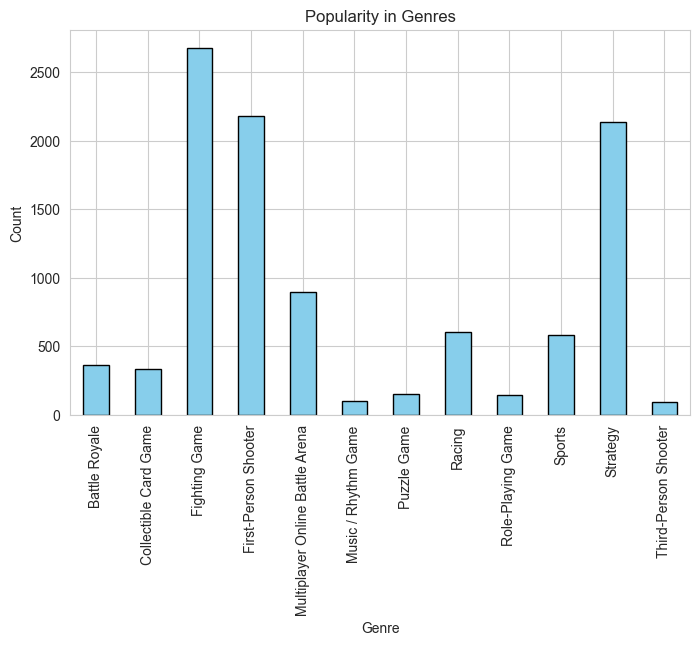

In [13]:

# Count occurrences in each segment
earnings_segment_counts = data["Genre"].value_counts().sort_index()

# Plot segmented earnings distribution
fig, ax = plt.subplots(figsize=(8, 5))
earnings_segment_counts.plot(kind="bar", color="skyblue", edgecolor="black", ax=ax)
ax.set_title("Popularity in Genres")
ax.set_xlabel("Genre")
ax.set_ylabel("Count")
plt.xticks(rotation=90)
plt.show()


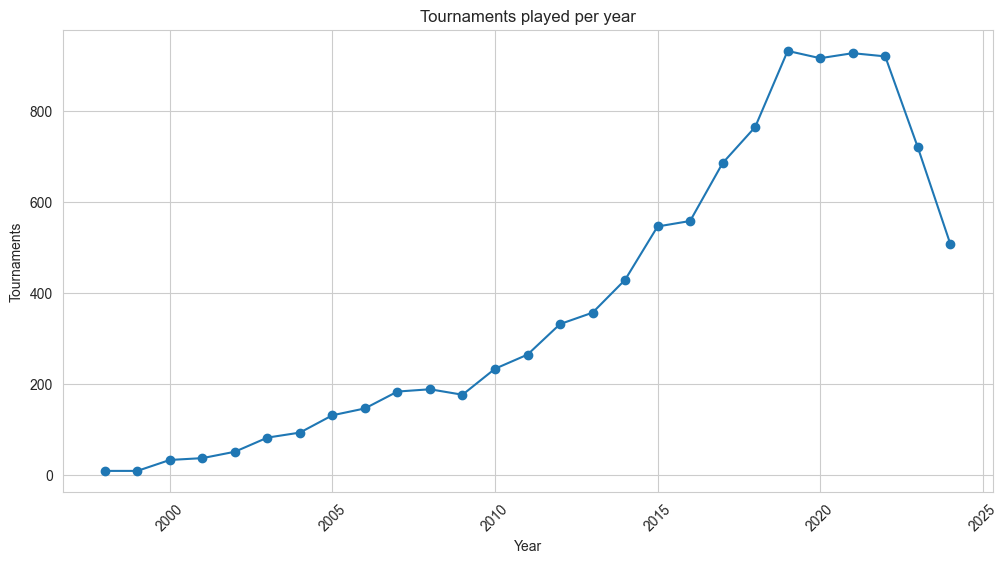

In [14]:
# Extrahera år
data["Year"] = pd.to_datetime(data["Date"]).dt.year

# Räkna antal turneringar per år
tournaments_per_year = data.groupby("Year").size()

# Plotta historiken
plt.figure(figsize=(12, 6))
plt.plot(tournaments_per_year.index, tournaments_per_year, marker="o", linestyle="-")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Tournaments played per year")
plt.grid(True)
plt.show()


In [15]:
pivot = data.pivot_table(values="Earnings", index="Year", columns="Game", aggfunc="mean").fillna(0).round(2)
pivot

Game,ARMS,Acceleration of SUGURI 2,After-H,Age of Empires,Age of Empires II,Age of Empires III,Age of Empires IV,Age of Empires Online,Age of Mythology,Aim Gods,...,Zombieland VR: Headshot Fever,Zula,Zwift,chess24,chessarena.com,eFootball,iRacing.com,osu!,rFactor,rFactor 2
Year,,,,,,,,,,,,,,,,,,,,,
1998,0.00,0.0,0.00,2000.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1999,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2000,0.00,0.0,0.00,9500.00,12640.92,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2001,0.00,0.0,0.00,0.00,20067.66,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2002,0.00,0.0,0.00,100.00,8108.46,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2003,0.00,0.0,0.00,625.00,2769.70,0.00,0.00,0.00,14882.20,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2004,0.00,0.0,0.00,0.00,5695.65,0.00,0.00,0.00,3394.50,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2005,0.00,0.0,0.00,0.00,4081.69,0.00,0.00,0.00,2250.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2006,0.00,0.0,0.00,144.62,6333.14,1125.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00


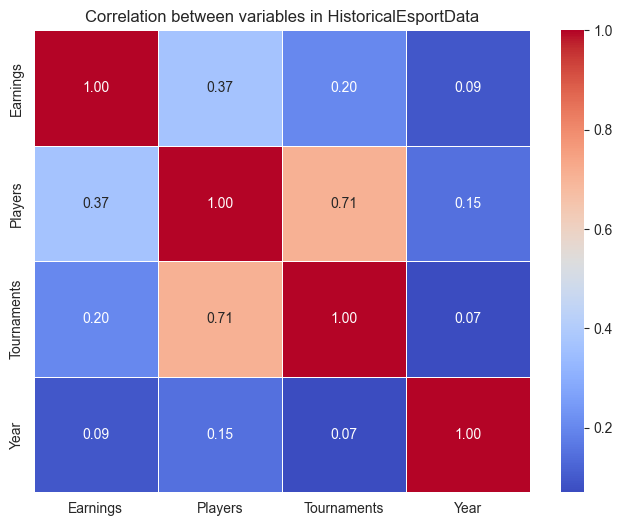

In [16]:

fixed_data = data.drop(columns=["Game_numerical"], errors = "ignore")
fixed_corr = fixed_data.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(fixed_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Correlation between variables in HistoricalEsportData")
plt.show()


Players och Tournaments (0.71)

Hög positiv korrelation → Ju fler turneringar, desto fler spelare deltar.
Detta är logiskt eftersom fler tävlingar lockar fler deltagare.

Earnings och Players (0.37)

Medelhög korrelation → Fler spelare leder ibland till högre earnings, men det är inte en stark regel.
Vissa spel kan ha få spelare men höga prispengar, medan andra har många spelare men låg vinst.

Earnings och Tournaments (0.20)

Låg korrelation → Antalet turneringar har inte så stor inverkan på totala vinster.
Detta kan bero på att vissa turneringar har högre prispengar än andra.

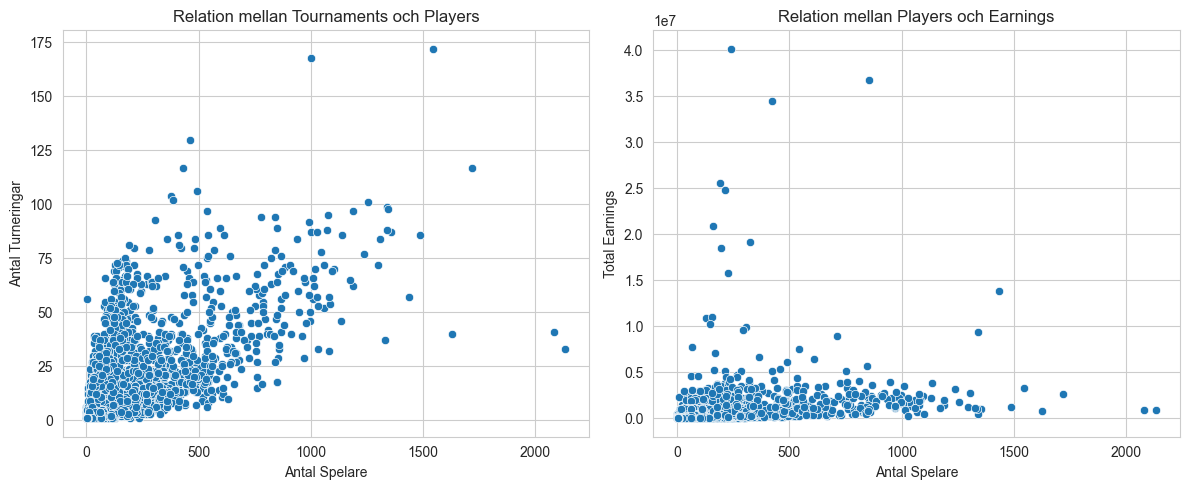

In [ ]:
# Skapar scatter-plots för att visa relationerna mellan variablerna

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter-plot mellan Players och Tournaments (hög korrelation)
sns.scatterplot(y=data["Tournaments"], x=data["Players"], ax=axes[0])
axes[0].set_title("The relationship between Tournaments och Players")
axes[0].set_ylabel("Number of tournaments")
axes[0].set_xlabel("Number of players")

# Scatter-plot mellan Earnings och Players (lägre korrelation)
sns.scatterplot(x=data["Players"], y=data["Earnings"], ax=axes[1])
axes[1].set_title("The relationship between Players och Earnings")
axes[1].set_ylabel("Total Earnings")
axes[1].set_xlabel("Number of players")

plt.tight_layout()
plt.show()


Om vi ska förutsäga antal spelare → Vi kan använda antal turneringar eftersom det finns ett tydligt samband.

Om vi ska förutsäga earnings → Vi behöver fler variabler, eftersom det inte finns ett tydligt samband med varken spelare eller turneringar.

In [18]:
# Skapar en ny kolumn "Earnings per Tournament"
data["Earnings per Tournament"] = data["Earnings"] / data["Tournaments"]

# Ersätt NaN eller oändliga värden (om det finns turneringar med 0 värde)
data["Earnings per Tournament"] = data["Earnings per Tournament"].replace([float("inf"), -float("inf")], 0).fillna(0)

print(data["Earnings per Tournament"].describe())



count    1.023900e+04
mean     4.306049e+04
std      1.997959e+05
min      0.000000e+00
25%      5.681608e+02
50%      3.730000e+03
75%      1.926638e+04
max      8.028130e+06
Name: Earnings per Tournament, dtype: float64


Vi har tagit reda på pengar som delats ut i turneringar mellan åren 1998-2024 samt antalet spelare per turnering.

Vi har även tagit med:
korreleration mellan variablerna: spelare, år, turneringar och prispengar

Vi kan se vilka Genrer som har flest turneringar

Esport har blivit mer populärt med åren enligt vår data.

vi kan se hur många turneringar som spelats varje år



FRÅGA 12
vill man tjäna mest pengar ska man spela? *spelet* *vänt*

Vilket spel har haft flest turneringar genom tiderna? ???
Vilket spel har haft störst ökning i prispengar över tid? ???

Vilken genre har vuxit snabbast i antal turneringar? *intressant*

Vilket spel har flest turneringar men minst prispengar? ???

Kan vi förutse vilka spel/kategorier som kommer vara störst inom esport om 5 år? *intressant*


Vilken genre är populärast i Esport mellan åren?

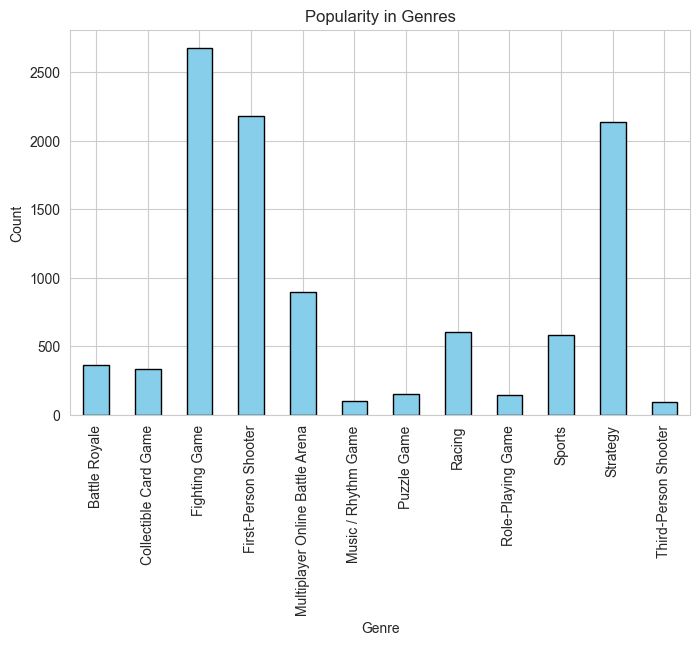

Vilket år hade flest turneringar?
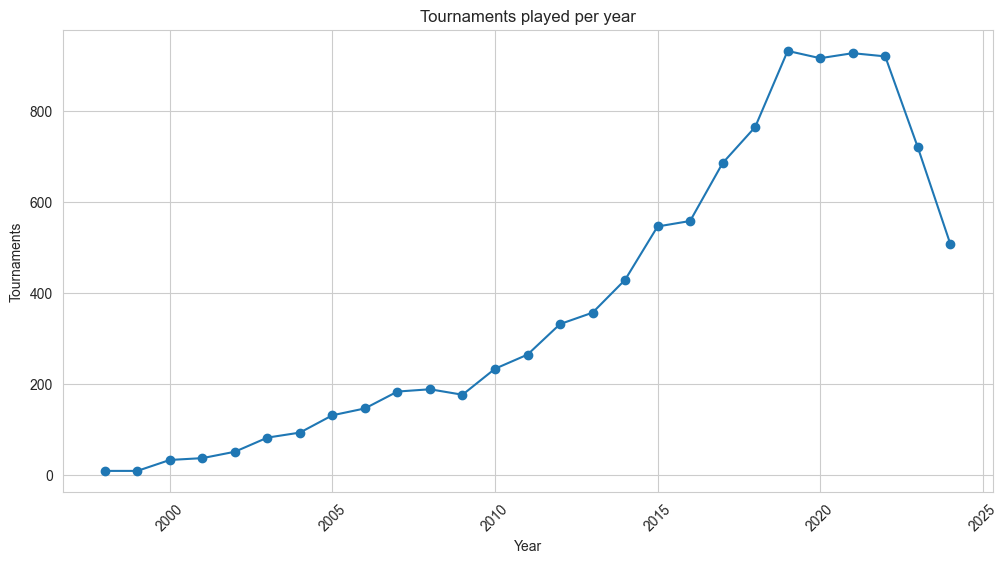

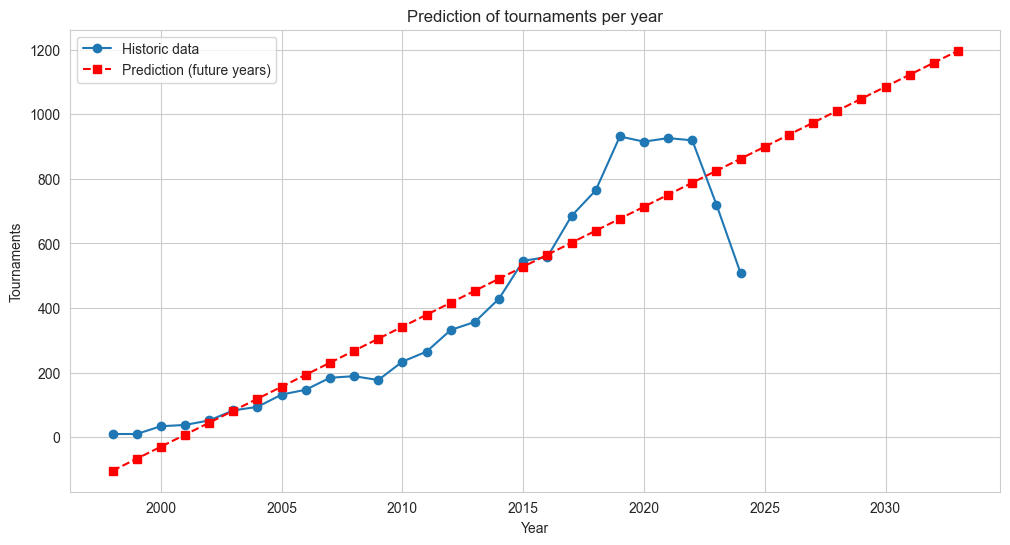

In [19]:
# Förbered data för regression
X = tournaments_per_year.index.values.reshape(-1, 1)  # År som input
y = tournaments_per_year.values  # Antal turneringar som output

# Skapa och träna modellen
model = LinearRegression()
model.fit(X, y)

# Prediktera framtida år
future_years = np.arange(X.min(), X.max() + 10).reshape(-1, 1)  # Prognos 10 år framåt
predictions = model.predict(future_years)

# Plotta historik och prognos
plt.figure(figsize=(12, 6))
plt.plot(tournaments_per_year.index, tournaments_per_year, marker="o", linestyle="-", label="Historic data")
plt.plot(future_years, predictions, marker="s", linestyle="--", label="Prediction (future years)", color="red")
plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Prediction of tournaments per year")
plt.legend()
plt.grid(True)




Ovanför förutspår vi in i framtiden för att se hur många turneringar som kan komma att arrangeras i framtiden. Vi gör detta med hjälp av att skapa en linjär reggression.

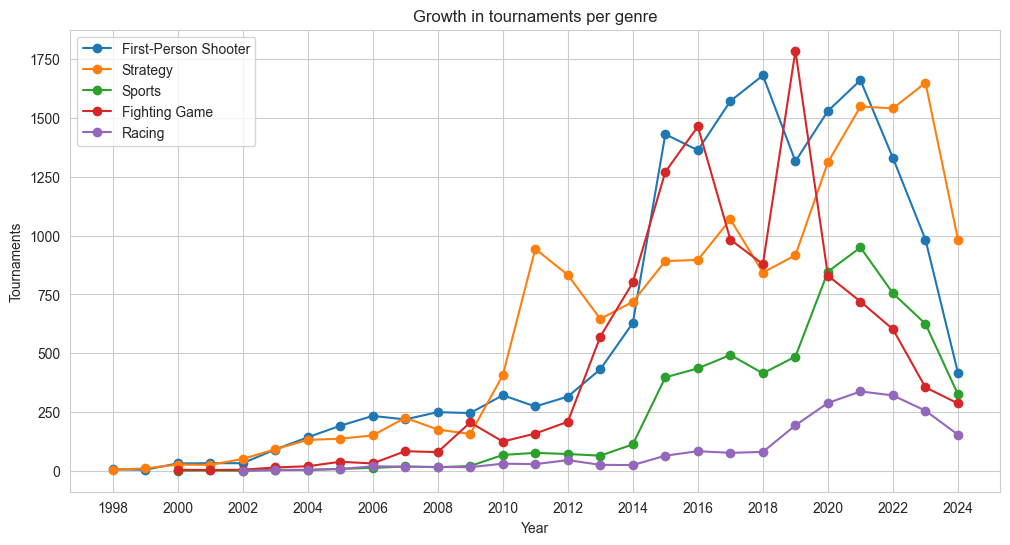

In [20]:
#Vilken genre har vuxit snabbast i antal turneringar? *intressant*
# Gruppera efter genre och år, summera antalet turneringar
growth = data.groupby(["Genre", "Year"])["Tournaments"].sum().reset_index()

# Beräkna Genomsnittlig årlig tillväxt
pivot_growth = growth.pivot(index="Year", columns="Genre", values="Tournaments").fillna(0)

#beräkning per genre
result = {}
years = pivot_growth.index

for genre in pivot_growth.columns:
    start_year = pivot_growth.loc[years.min(), genre]
    end_year = pivot_growth.loc[years.max(), genre]
    diff = years.max() - years.min()

    # CAGR = Compound Annual Growth Rate
    if start_year > 0 and diff > 0:
        cagr = ((end_year / start_year) ** (1 / diff)) - 1
        result[genre] = cagr

#Konvertera till DataFrame för visning
cagr_dataframe = pd.DataFrame(result.items(), columns=["Genre", "CAGR"]).sort_values(by="CAGR", ascending=False)

# Filtrera ut genrer med tillräcklig data för att göra en meningsfull visualisering
top_five_genres = growth["Genre"].value_counts().index[:5]

# Filtrera datasetet för att inkludera dessa genrer
filtered_growth = growth[growth["Genre"].isin(top_five_genres)]

# Skapa ett linjediagram för att visa tillväxten av turneringar per genre över tid
plt.figure(figsize=(12, 6))

for genre in top_five_genres:
    subset = filtered_growth[filtered_growth["Genre"]==genre]
    plt.plot(subset["Year"], subset["Tournaments"], marker="o", label=genre)

# Anpassa x-axeln för att visa fler sektioner (varannat år)
plt.xticks(np.arange(growth["Year"].min(), growth["Year"].max() + 1, 2))

plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Growth in tournaments per genre")
plt.legend()
plt.grid(True)


ovanför besvaras: Vilken genre som har vuxit snabbast i antal arrangerade turneringar.


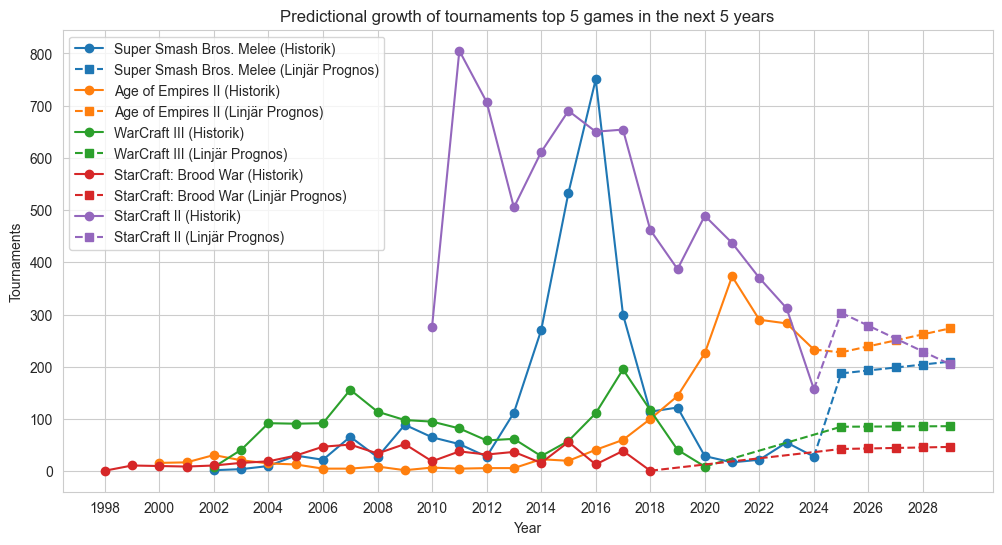

In [21]:
#Kan vi förutse vilka spel/kategorier som kommer vara störst inom esport om 5 år?

# Skapa en figur för att visualisera de 5 största spelen med linjär regression
plt.figure(figsize=(12, 6))

top_five_games = data["Game"].value_counts().index[:5]
upcoming_years = list(range(data["Year"].max() + 1, data["Year"].max() + 6))

predict_results = {}

# Definiera färger för varje spel
colors = matplotlib.colormaps.get_cmap("tab10")
color_map = {game: colors(i % 10) for i, game in enumerate(top_five_games)}

# Prognosera framtida tillväxt för de 5 mest populära spelen
for game in top_five_games:
    subset = data[data["Game"] == game].copy()
    subset["Year"] = pd.to_datetime(subset["Date"]).dt.year
    subset = subset.groupby("Year")["Tournaments"].sum().reset_index()

    # Om det finns för få datapunkter, hoppa över
    if len(subset) < 3:
        continue

    # Förbered data för linjär regression
    X = subset["Year"].values.reshape(-1, 1)
    y = subset["Tournaments"].values

    # Träna en linjär regressionsmodell
    model = LinearRegression()
    model.fit(X, y)

    # Gör en prognos för de kommande 5 åren
    x_prediction = np.array(upcoming_years).reshape(-1, 1)
    prediction = model.predict(x_prediction)

    # Spara prognosen
    predict_results[game] = prediction

  # Plotta historisk data
    plt.plot(subset["Year"], subset["Tournaments"], marker="o", linestyle="-", label=f"{game} (Historik)", color=color_map[game])

    # För att få en linje som går från sista datapunkten till första prediktiva punkt
    plt.plot([subset["Year"].iloc[-1], upcoming_years[0]], [subset["Tournaments"].iloc[-1], prediction[0]],
             linestyle="--", color=color_map[game])

    # Plotta prognosen med linjär regression
    plt.plot(upcoming_years, prediction, linestyle="--", marker="s", label=f"{game} (Linjär Prognos)", color=color_map[game])

    # Anpassa x-axeln för att inkludera framtida år
plt.xticks(np.arange(data["Year"].min(), max(upcoming_years) + 1, 2))


plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Predictional growth of tournaments top 5 games in the next 5 years")
plt.legend()
plt.grid(True)




Ovanför kan vi förutse vilka spel som kommer vara störst inom esport om 5 år